### IMPORTS

In [58]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import math
from matplotlib import pyplot

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 4]
sns.set(style="darkgrid")


%matplotlib inline

### Load Data

In [2]:
data = pd.read_excel(r'.\data\data.xlsx')

df = data.copy()

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   week       260 non-null    object 
 1   product    260 non-null    object 
 2   orders     259 non-null    float64
 3   brand      260 non-null    object 
 4   views      259 non-null    float64
 5   cart_adds  259 non-null    float64
 6   price      259 non-null    float64
 7   inventory  260 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 16.4+ KB


In [4]:
df.head()

,week,product,orders,brand,views,cart_adds,price,inventory
0,12/8/2019,A,41.0,Big Cable Brand,4181.0,209.0,34.99,158
1,12/15/2019,A,36.0,Big Cable Brand,3228.0,114.0,29.99,122
2,12/22/2019,A,51.0,Big Cable Brand,5259.0,108.0,29.99,71
3,12/29/2019,A,38.0,Big Cable Brand,3574.0,50.0,24.99,33
4,1/5/2020,A,33.0,Big Cable Brand,5970.0,66.0,34.99,0


In [5]:
'''
assumptions:
inventory = how much in stock
views = interest
cart_adds = actual buying interest
orders = actual demand or orders placed
'''

'\nassumptions:\ninventory = how much in stock\nviews = interest\ncart_adds = actual buying interest\norders = actual demand or orders placed\n'

In [6]:
df.describe()

,orders,views,cart_adds,price,inventory
count,259.000000,259.000000,259.000000,259.000000,260.000000
mean,19.413127,2156.447876,50.111969,69.951390,80.057692
std,14.731024,1952.060224,49.124101,61.324199,49.346859
min,0.000000,39.000000,0.000000,19.990000,0.000000
25%,7.000000,587.000000,16.000000,34.990000,50.750000
50%,16.000000,1466.000000,37.000000,49.990000,70.000000
75%,30.000000,3203.000000,67.000000,82.490000,94.250000
max,100.000000,9138.000000,309.000000,524.990000,308.000000


In [7]:
df['brand'].value_counts()

Little Cable Brand    156
Big Cable Brand       104
Name: brand, dtype: int64

In [8]:
df.isnull().sum(axis = 0)
#check for missing values

week         0
product      0
orders       1
brand        0
views        1
cart_adds    1
price        1
inventory    0
dtype: int64

In [9]:
df[df['price'].isnull()]
#ignoring this row, bad data

,week,product,orders,brand,views,cart_adds,price,inventory
60,2/2/2020,B,NaN,Big Cable Brand,NaN,NaN,NaN,85


In [10]:
#cleaning columns
df=df[~df['price'].isnull()]
df['week'] = pd.to_datetime(df['week'])

In [11]:
df['inventory_surplus'] = df['inventory'] - df['orders']
# want this to be as close to 0 as possible, limit the excess and potential shortfall of inventory

c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

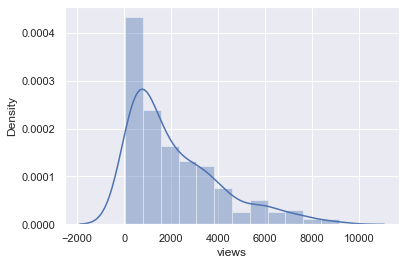

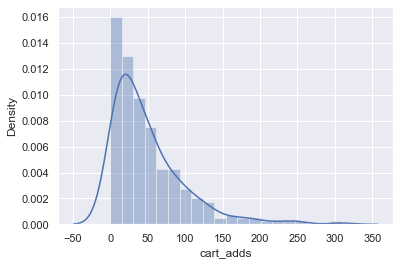

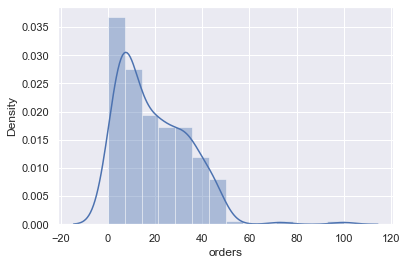

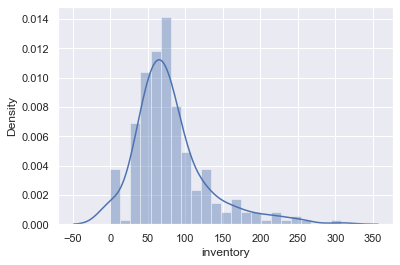

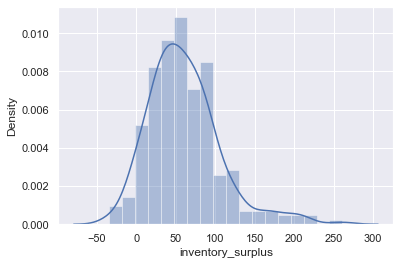

In [12]:
df_columns = df[['views','cart_adds','orders','inventory', 'inventory_surplus']]
for column in df_columns:
    plt.figure()             
    sns.distplot(df[column])

<AxesSubplot:>

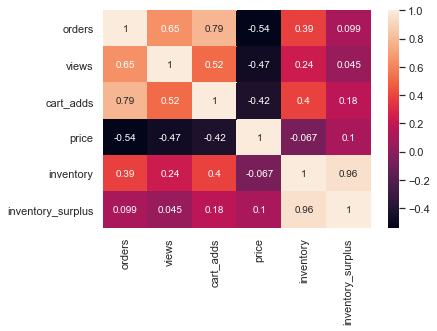

In [13]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

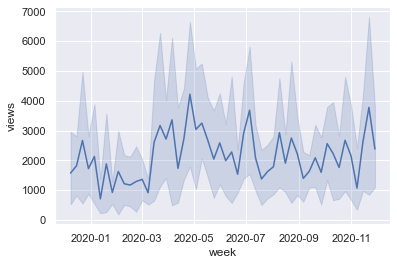

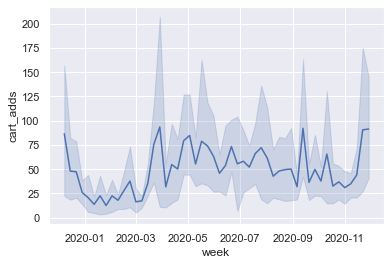

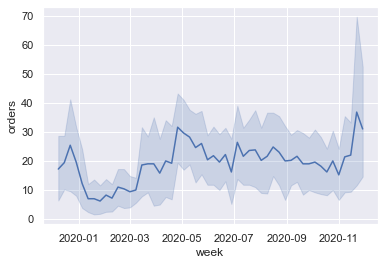

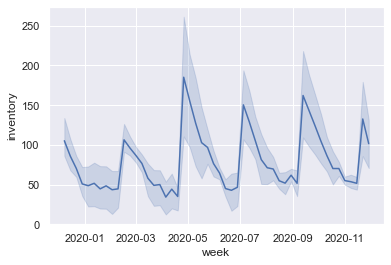

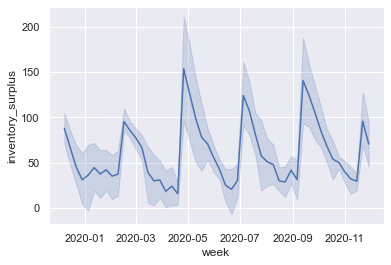

In [14]:
for column in df_columns:
    sns.lineplot(x="week", y=column, data=df)
    plt.show()

#don't see a lot of seasonality or trends, maybe just the early peaks in the year
#trend in inventory - order a lot then let it sell then order again (order again at 50)

In [15]:
df.groupby(['product', 'brand']).mean()

,,orders,views,cart_adds,price,inventory,inventory_surplus
product,brand,,,,,,
A,Big Cable Brand,29.923077,3195.480769,72.596154,36.240000,87.846154,57.923077
B,Big Cable Brand,6.882353,685.078431,16.372549,138.519412,73.470588,66.588235
C,Little Cable Brand,26.288462,2812.826923,66.115385,42.105385,81.653846,55.365385
D,Little Cable Brand,25.076923,3198.519231,71.307692,44.605385,88.076923,63.000000
E,Little Cable Brand,8.653846,862.038462,23.519231,89.605385,69.019231,60.365385


c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


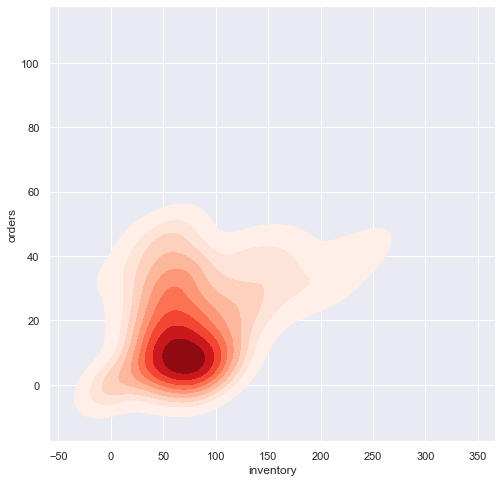

In [16]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the two density plots
ax = sns.kdeplot(df.inventory, df.orders,
             cmap="Reds", shade=True, shade_lowest=False)

#can see the surplus of inventory to orders, vertical increase not linear

c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


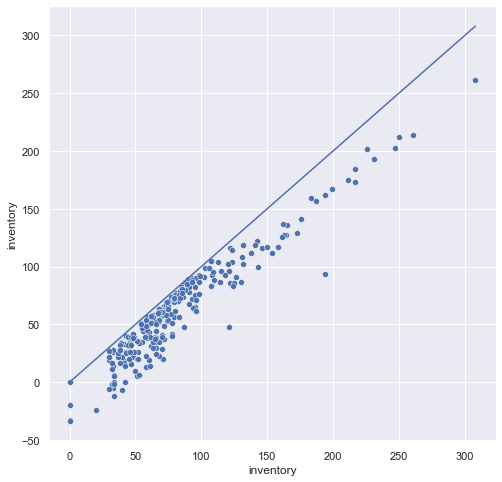

In [17]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the two density plots
ax2 = sns.lineplot(df.inventory, df.inventory)
ax = sns.scatterplot(df.inventory, df.inventory_surplus)


#more inventory -> more inventory surplus, want to flatten this line

c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\csunj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


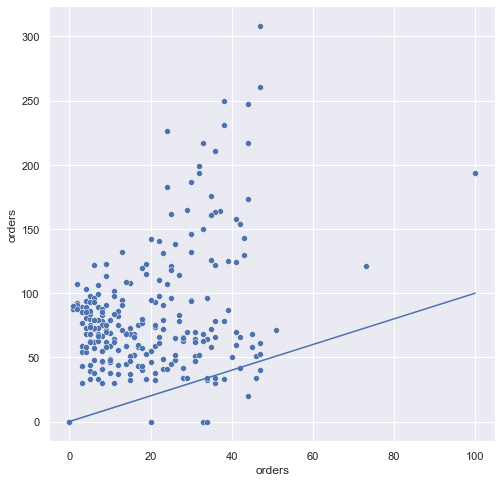

In [18]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the two density plots
ax2 = sns.lineplot(df.orders, df.orders)
ax = sns.scatterplot(df.orders, df.inventory)


#increase in inventory more than required with increase in orders

In [19]:
#chance of orders > inventory = 3.86%
(df[df['orders']>df['inventory']].shape[0]/df.shape[0])*100

3.861003861003861

In [20]:
df.orders.median()

16.0

In [21]:
(df[df['inventory'] >df.orders.median()].shape[0]/df.shape[0])*100

94.98069498069498

In [22]:
# 5.02% of instances when inventory less than the orders median of 16
(df[df['inventory'] <df.orders.median()].shape[0]/df.shape[0])*100

5.019305019305019

<h2> Model Creation </h2>

In [23]:
df2 = df

In [24]:
df=df2

In [25]:
#don't need inventory_surplus column
df = df.drop('inventory_surplus', axis=1)
df = pd.merge(df, df.groupby(['product'])['price'].mean().reset_index(), on='product')
df['mean_price_dif_abs'] = abs(df['price_x']-df['price_y'])
del df['price_y']

In [26]:
#convert categorical variables to numerical with one hot encoding
product_hot = pd.get_dummies(df['product'])
df = df.join(product_hot)
df = df.drop('product', axis=1)
df = df.drop('brand', axis=1)

In [27]:
df['day_of_month'] = df['week'].apply(lambda x: x.day)
df['month'] = df['week'].apply(lambda x: x.month)
df['year'] = df['week'].apply(lambda x: x.year)
df = df.drop('week', axis=1)

In [28]:
df=df.sort_values(['year', 'month','day_of_month'])

In [29]:
df = df.drop('views', axis=1)
df = df.drop('cart_adds', axis=1)
df = df.drop('inventory', axis=1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [32]:
values = df.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t)
1,0.41,0.029703,0.002241,1.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.0,0.02
2,0.02,0.534653,0.391327,0.0,1.0,0.0,0.0,0.0,0.233333,1.0,0.0,0.23
3,0.23,0.039604,0.004483,0.0,0.0,1.0,0.0,0.0,0.233333,1.0,0.0,0.12
4,0.12,0.089109,0.051802,0.0,0.0,0.0,1.0,0.0,0.233333,1.0,0.0,0.08
5,0.08,0.128713,0.010958,0.0,0.0,0.0,0.0,1.0,0.233333,1.0,0.0,0.36


In [35]:
labels_col = 'var1(t)'
labels = reframed[labels_col]
series = reframed.drop(labels_col, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.15, random_state=0)
train_X = X_train.values.reshape((X_train.shape[0],1, X_train.shape[1]))
test_X = X_test.values.reshape((X_test.shape[0],1, X_test.shape[1]))

print('Train set shape', X_train.shape)
print('Test set shape', X_test.shape)

Train set shape (219, 11)
Test set shape (39, 11)


In [36]:
epochs = 20
batch = 256



model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                12400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model_lstm.fit(train_X, Y_train, validation_data=(test_X, Y_test), epochs=epochs, verbose=2)

Epoch 1/20
7/7 - 0s - loss: 0.0616 - val_loss: 0.0610
Epoch 2/20
7/7 - 0s - loss: 0.0478 - val_loss: 0.0480
Epoch 3/20
7/7 - 0s - loss: 0.0374 - val_loss: 0.0374
Epoch 4/20
7/7 - 0s - loss: 0.0287 - val_loss: 0.0295
Epoch 5/20
7/7 - 0s - loss: 0.0230 - val_loss: 0.0236
Epoch 6/20
7/7 - 0s - loss: 0.0197 - val_loss: 0.0197
Epoch 7/20
7/7 - 0s - loss: 0.0171 - val_loss: 0.0173
Epoch 8/20
7/7 - 0s - loss: 0.0158 - val_loss: 0.0159
Epoch 9/20
7/7 - 0s - loss: 0.0147 - val_loss: 0.0149
Epoch 10/20
7/7 - 0s - loss: 0.0137 - val_loss: 0.0144
Epoch 11/20
7/7 - 0s - loss: 0.0129 - val_loss: 0.0139
Epoch 12/20
7/7 - 0s - loss: 0.0123 - val_loss: 0.0136
Epoch 13/20
7/7 - 0s - loss: 0.0118 - val_loss: 0.0135
Epoch 14/20
7/7 - 0s - loss: 0.0114 - val_loss: 0.0133
Epoch 15/20
7/7 - 0s - loss: 0.0111 - val_loss: 0.0131
Epoch 16/20
7/7 - 0s - loss: 0.0109 - val_loss: 0.0129
Epoch 17/20
7/7 - 0s - loss: 0.0108 - val_loss: 0.0126
Epoch 18/20
7/7 - 0s - loss: 0.0105 - val_loss: 0.0128
Epoch 19/20
7/7 - 0

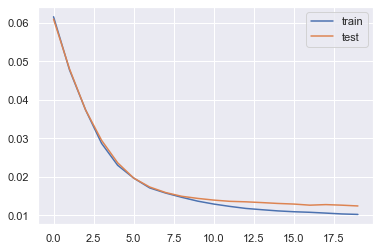

In [38]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [39]:
yhat = model_lstm.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = Y_test.reshape((len(Y_test), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 11.139


In [74]:
import numpy.ma as ma
masked_actual = ma.masked_array(inv_y, mask=inv_y==0)
MAPE = (np.fabs(masked_actual - inv_yhat)/masked_actual).mean()

In [76]:
MAPE*100

36.250711742200345

In [40]:
#Assembling dataset
test_df = X_test.copy()

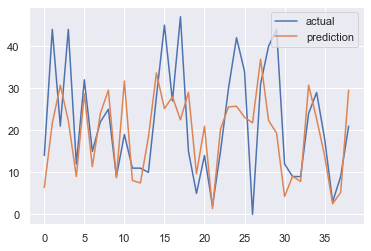

In [41]:
pyplot.plot(inv_y, label='actual')
pyplot.plot(inv_yhat, label='prediction')
pyplot.legend()
pyplot.show()

In [42]:
test_df = test_df.reset_index()

In [43]:
#Convert estimates 
yhat_values = pd.Series(inv_yhat, name="yhat")
y_values = pd.Series(inv_y, name="y")
y_df = y_values.to_frame()
yhat_df = yhat_values.to_frame()

## Creating Final DataFrame

In [44]:
test_df = test_df.join(yhat_df)
test_df = test_df.join(y_df)

In [55]:
#test_df

In [46]:
test_df['yhat'] = round(test_df['yhat'],0)
test_df['y'] = round(test_df['y'],0)

In [47]:
df =df.reset_index()
df.index = df.index.astype(int)

In [48]:
test_df = test_df.set_index(['index'])
test_df.index = test_df.index.astype(int)

In [49]:
output = df.merge(test_df[['yhat','y']], how="inner", right_index=True, left_index=True)

In [53]:
#test_df

In [54]:
#export test results
#output

In [52]:
output.to_excel('output.xlsx',index=False)